# Imports

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction import DictVectorizer

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

%matplotlib inline

In [5]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [6]:
df.shape

(150, 5)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

In [14]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


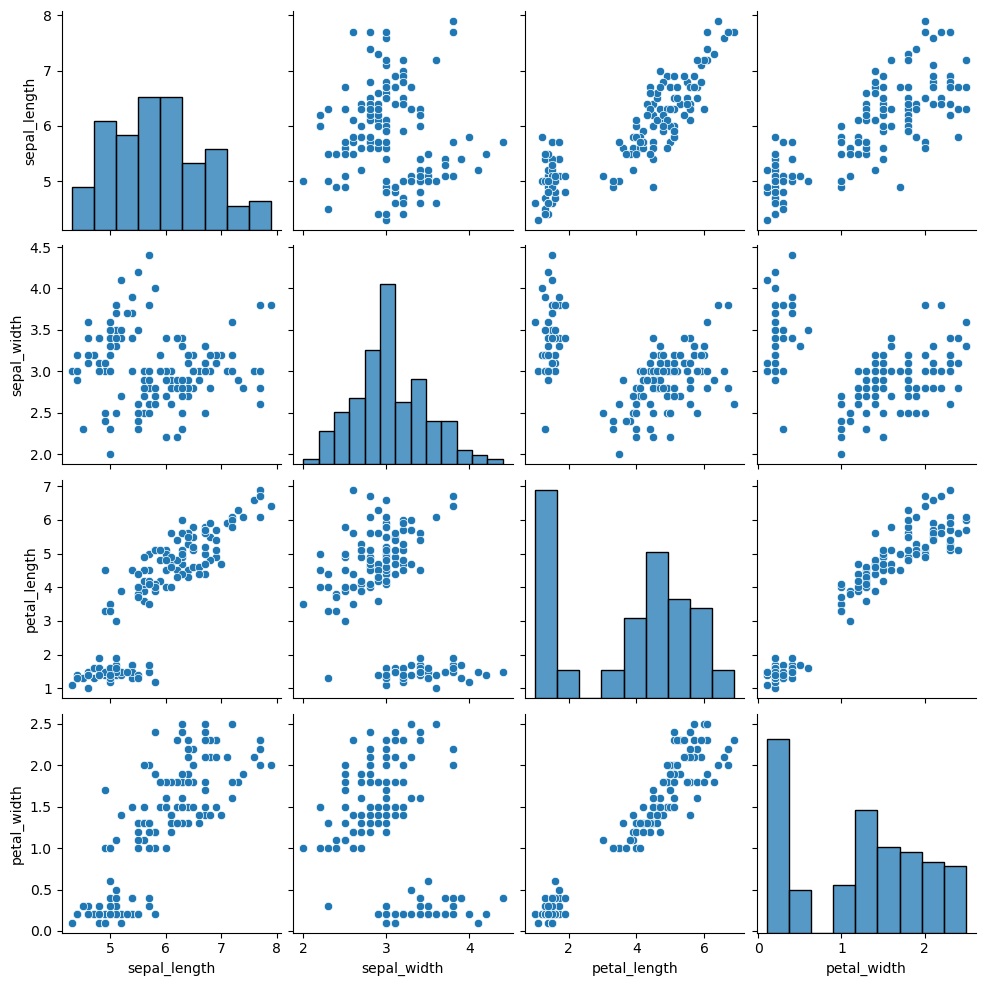

In [16]:
sns.pairplot(df)

<Axes: xlabel='species', ylabel='count'>

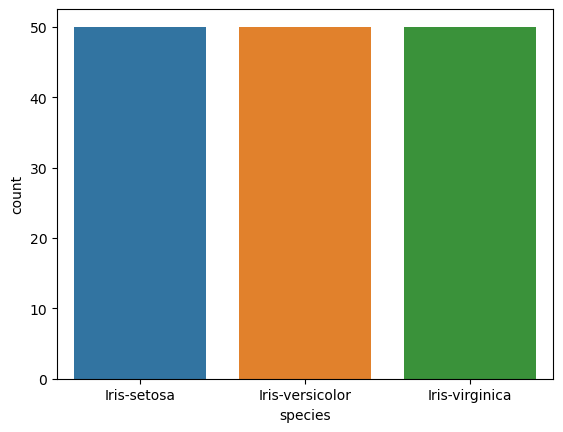

In [17]:
sns.countplot(x='species', data=df)

/tmp/ipykernel_33/3335124698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


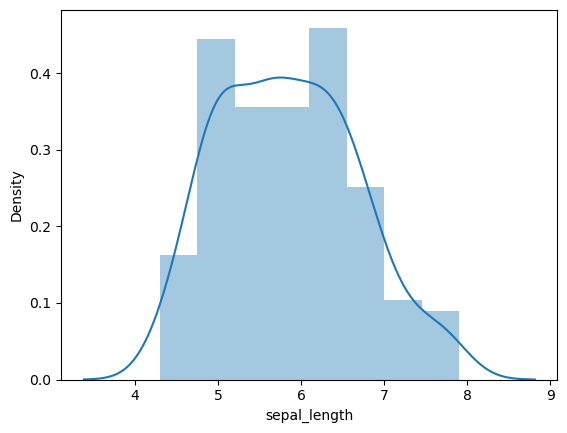

/tmp/ipykernel_33/3335124698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


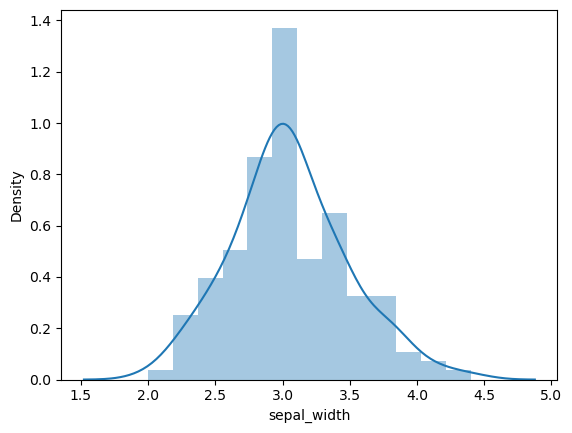

/tmp/ipykernel_33/3335124698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


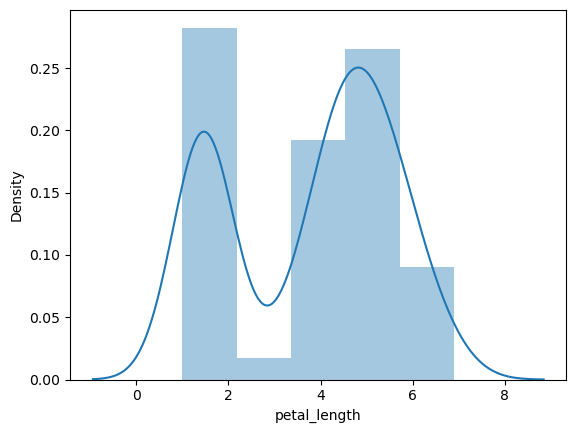

/tmp/ipykernel_33/3335124698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


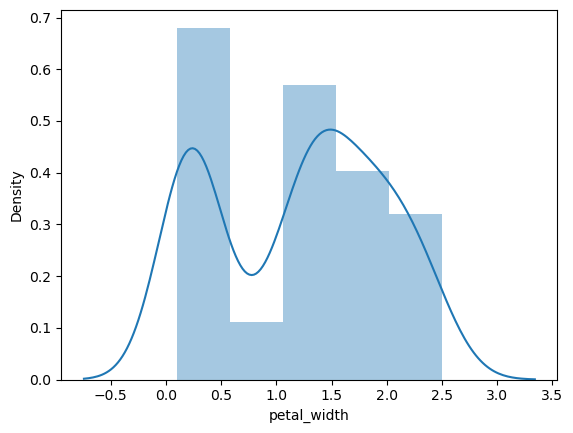

In [18]:
for col in list(df.columns):
    if col != "species":
        sns.distplot(df[col])
        plt.show()

In [20]:
import plotly.express as px

In [21]:
fig = px.scatter(data_frame=df, x='sepal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [25]:
fig = px.scatter(data_frame=df, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [26]:
fig = px.scatter(data_frame=df, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [27]:
fig = px.scatter(data_frame=df, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

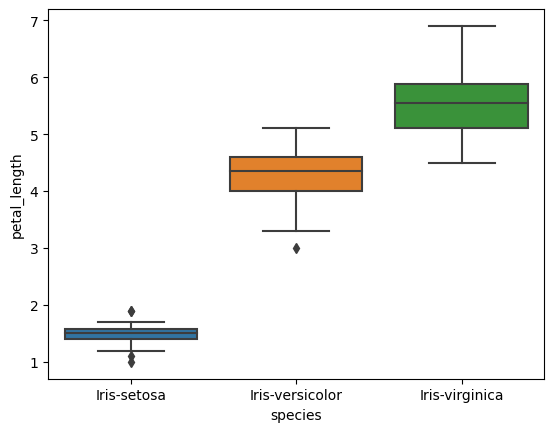

In [22]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

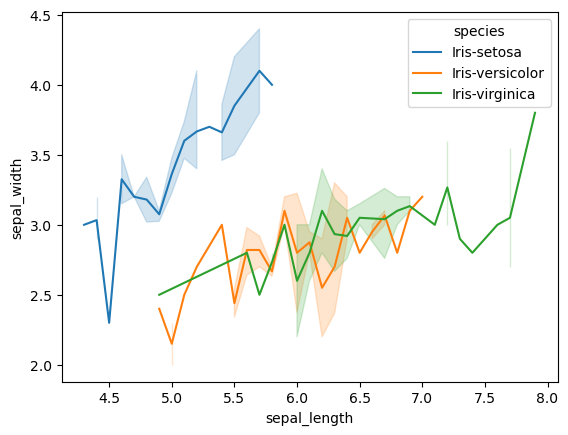

In [23]:
sns.lineplot(x = "sepal_length", y = "sepal_width", data = df, hue = "species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

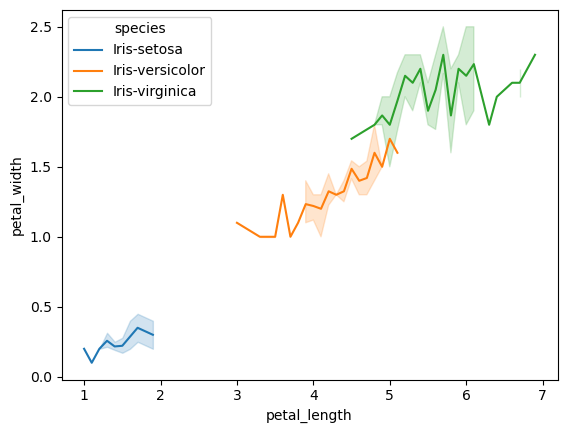

In [24]:
sns.lineplot(x = "petal_length", y = "petal_width", data = df, hue = "species")

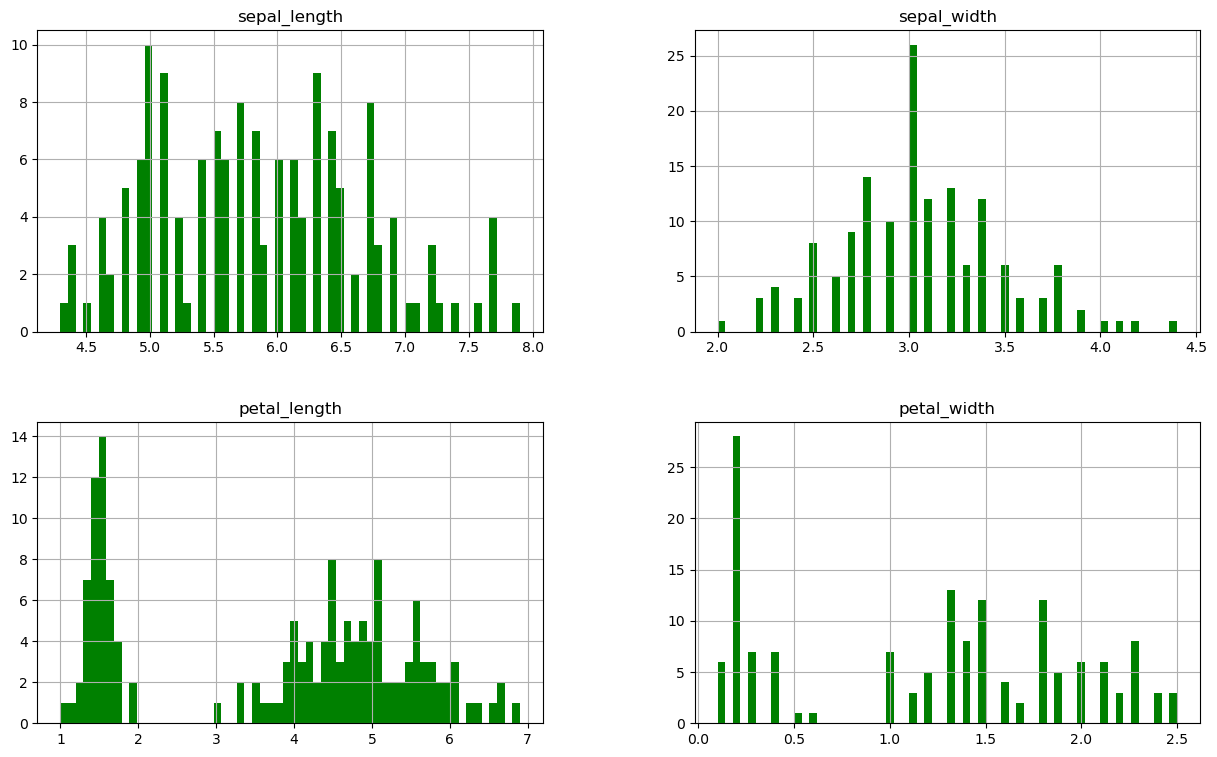

In [30]:
df.hist(bins=60, figsize=(15,9),color="green");plt.show()

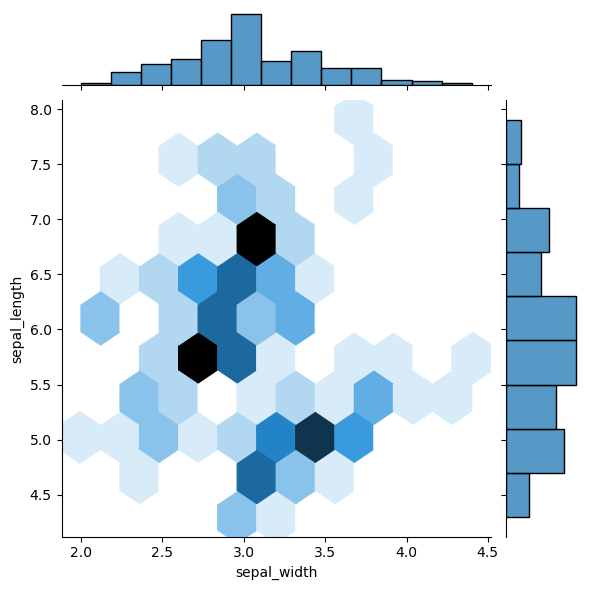

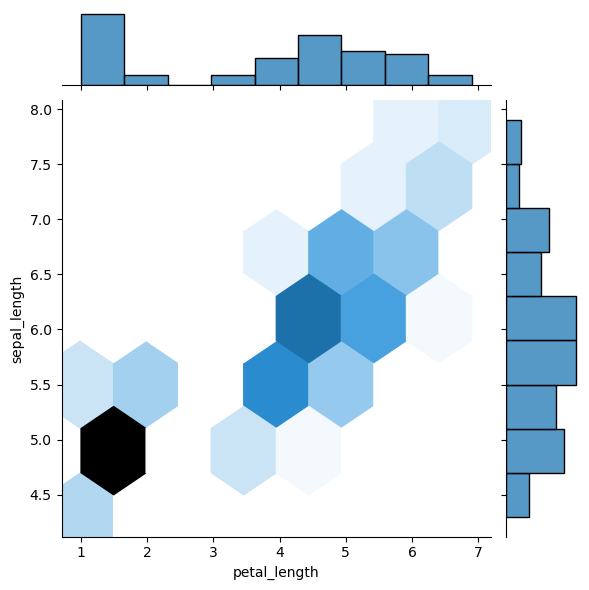

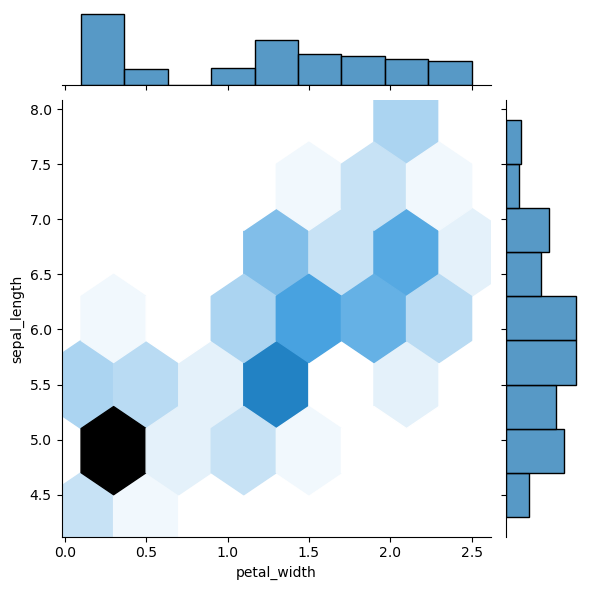

In [35]:
for col in list(df.columns):
    if(col != "sepal_length" and col!="species"):
        sns.jointplot(x = col,  y = "sepal_length",kind = "hex", data = df)
        plt.show()

In [38]:
le = LabelEncoder()


In [39]:
df.species = le.fit_transform(df.species)

In [40]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

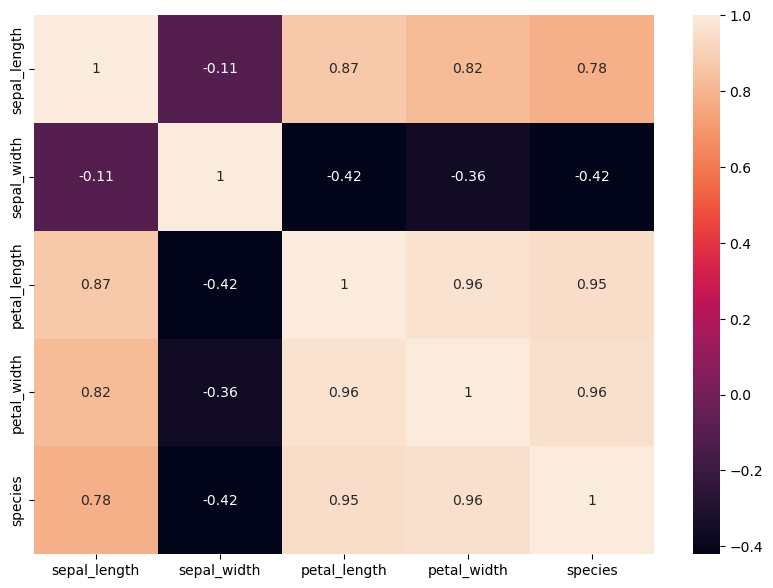

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Model

In [42]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [48]:

knn5 = KNeighborsClassifier(algorithm='auto')
xgb = XGBClassifier()
rfc = RandomForestClassifier
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
sc = StandardScaler()
svc = SVC()

In [45]:
kf = KFold(shuffle=True, random_state=42, n_splits=3)

In [51]:
est = Pipeline([("sc",sc),
                      ("knn", knn5)])

In [52]:
# estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'knn__n_neighbors': (1,10, 1),
    'knn__leaf_size': (20,40,1),
    'knn__p': (1,2),
    'knn__weights': ('uniform', 'distance'),
    'knn__metric': ('minkowski', 'chebyshev')}
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=est,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [53]:
grid_search_KNN.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': (20, 40, 1),
                         'knn__metric': ('minkowski', 'chebyshev'),
                         'knn__n_neighbors': (1, 10, 1), 'knn__p': (1, 2),
                         'knn__weights': ('uniform', 'distance')},
             scoring='accuracy')

In [54]:
ypp = grid_search_KNN.predict(x_test)

In [55]:
accuracy_score(y_test, ypp)

1.0

In [56]:
est.fit(x_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsClassifier())])

In [57]:
y11 = est.predict(x_test)

In [58]:
accuracy_score(y_test, y11)

1.0

<Axes: >

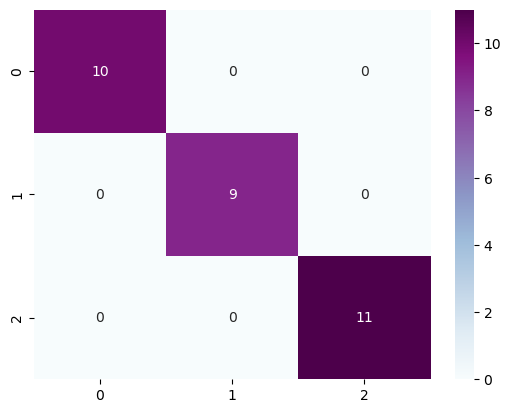

In [59]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y11)
sns.heatmap(cf,annot=True,cmap='BuPu')